In [333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1 - Read data and information about it

In [334]:
import os
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/uybor_scrapping.csv')

In [335]:
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291116,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


In [336]:
df.tail()

,location,district,rooms,size,level,max_levels,price,lat,lng
7416,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500,41.292252,69.341907
7417,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000,41.289606,69.343485
7418,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000,41.331415,69.268901
7419,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000,41.310486,69.292223
7420,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,30.0,2,4,22914,41.285755,69.211763


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [338]:
df['location'].value_counts()

город Ташкент, Чиланзарский район, Чиланзар                112
город Ташкент, Яккасарайский район, Кушбеги                110
город Ташкент, Мирзо-Улугбекский район, Буюк Ипак Йули      86
город Ташкент, Яккасарайский район, Бабура                  82
город Ташкент, Учтепинский район, Чиланзар 24-й квартал     79
                                                          ... 
город Ташкент, Чиланзарский район, Чиланзар. 2-2-4           1
город Ташкент, Чиланзарский район, Ак-Тепа                   1
город Ташкент, Яшнободский район, 1-й Муйнакский проезд      1
город Ташкент, Мирзо-Улугбекский район, Шукур Бурхонов       1
город Ташкент, Юнусабадский район, Юнусабад 13кв             1
Name: location, Length: 1556, dtype: int64

*2* - Data cleaning and preparation

In [339]:
df2=df

In [340]:
df2=df2.drop(['location'],axis=1,inplace=False)

###  data Define "Null" values

In [341]:
df2.isnull().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [342]:
df2.head()

,district,rooms,size,level,max_levels,price,lat,lng
0,Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,Яккасарайский,2,52.0,4,5,56000,41.291116,69.261104
2,Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


In [343]:
def encode_df(dataframe):
    le = LabelEncoder()
    for c in dataframe.columns:
          dataframe[c] = le.fit_transform(dataframe[c])
    return dataframe

In [344]:
df2 = encode_df(df2)
df2

,district,rooms,size,level,max_levels,price,lat,lng
0,8,2,109,3,3,343,704,409
1,9,1,87,3,4,369,251,310
2,6,1,53,3,3,215,148,177
3,6,2,144,0,3,323,244,79
4,6,2,165,2,4,361,330,126
...,...,...,...,...,...,...,...,...
7416,11,0,38,4,4,89,261,625
7417,11,1,76,0,3,164,239,628
7418,7,1,138,2,8,251,542,350
7419,2,0,5,0,3,2,394,473


In [345]:
df2.head()

,district,rooms,size,level,max_levels,price,lat,lng
0,8,2,109,3,3,343,704,409
1,9,1,87,3,4,369,251,310
2,6,1,53,3,3,215,148,177
3,6,2,144,0,3,323,244,79
4,6,2,165,2,4,361,330,126


3 - Analyze the graphical appearance of the data (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


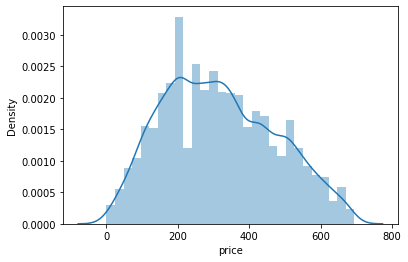

In [346]:
import seaborn as sns

sns.distplot(df2['price'])

4.2. Korelasia view

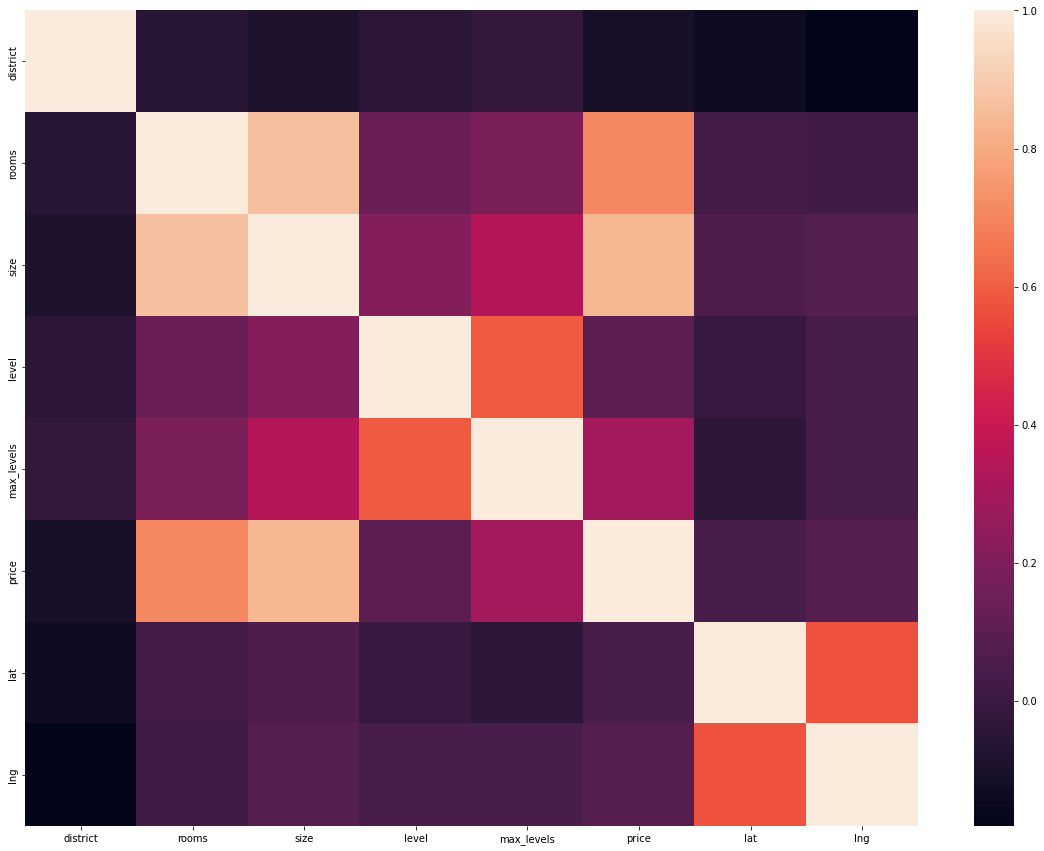

In [347]:
pyplot.subplots(figsize=(20,15))
sns.heatmap(df2.corr())

## Train the  RandomForestClassifier Model

In [348]:
y = df2['price']

In [349]:
x = df2.drop(['price'], axis = 1, inplace=False)

#inplace = False means the drop column will be less than DF3

In [350]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x, y)
# new class distribution 
print(Counter(y_ros))

Counter({343: 157, 369: 157, 215: 157, 323: 157, 361: 157, 99: 157, 52: 157, 44: 157, 108: 157, 60: 157, 87: 157, 146: 157, 63: 157, 168: 157, 293: 157, 310: 157, 326: 157, 476: 157, 426: 157, 314: 157, 145: 157, 164: 157, 285: 157, 372: 157, 199: 157, 75: 157, 402: 157, 439: 157, 262: 157, 345: 157, 276: 157, 492: 157, 266: 157, 71: 157, 514: 157, 536: 157, 131: 157, 189: 157, 337: 157, 316: 157, 251: 157, 435: 157, 256: 157, 354: 157, 208: 157, 416: 157, 417: 157, 450: 157, 520: 157, 500: 157, 42: 157, 329: 157, 509: 157, 157: 157, 111: 157, 19: 157, 116: 157, 393: 157, 311: 157, 227: 157, 139: 157, 409: 157, 304: 157, 385: 157, 106: 157, 550: 157, 350: 157, 8: 157, 553: 157, 242: 157, 399: 157, 321: 157, 33: 157, 272: 157, 300: 157, 86: 157, 384: 157, 364: 157, 152: 157, 259: 157, 331: 157, 12: 157, 294: 157, 348: 157, 100: 157, 202: 157, 210: 157, 606: 157, 506: 157, 558: 157, 443: 157, 134: 157, 183: 157, 93: 157, 240: 157, 578: 157, 126: 157, 279: 157, 250: 157, 89: 157, 647: 157

## 5.3. Create a Model

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=101)

In [353]:
from sklearn.linear_model import LinearRegression

In [354]:
lm = LinearRegression()

In [355]:
lm.fit(X_train,y_train)

LinearRegression()

In [356]:
predictions= lm.predict(X_test)

In [357]:
predictions

array([247.10193491, 233.02678005, 120.79847976, ..., 654.95239777,
       274.92958709,  95.61422193])

In [358]:
lm.intercept_

52.55001908886197

In [359]:
lm.coef_

array([ -0.81193538, -10.93559995,   1.95213871, -10.07998479,
         4.45709036,   0.02908286,  -0.04660348])

# 6 - Model-based estimation

In [360]:
pred = lm.predict(X_test)

In [361]:
pred

array([247.10193491, 233.02678005, 120.79847976, ..., 654.95239777,
       274.92958709,  95.61422193])

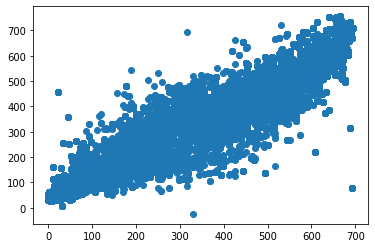

In [362]:
pyplot.scatter(y_test, pred)

In [363]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pred - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))


Coefficients: 
 [ -0.81193538 -10.93559995   1.95213871 -10.07998479   4.45709036
   0.02908286  -0.04660348]
Mean squared error: 8295.35
Variance score: 0.79
